In [4]:
import pandas as pd

df = pd.read_parquet("hf://datasets/FronkonGames/steam-games-dataset/data/train-00000-of-00001-e2ed184370a06932.parquet")
df.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [5]:
## column display, description
column_info = pd.DataFrame({
    "Column Name": df.columns.tolist(),
    "Data Type": df.dtypes.astype(str),
    "Non-Null Count": df.count().values.astype(str),
    "Unique Count": df.nunique().values.astype(str),
})


print(column_info.to_markdown())

|                            | Column Name                | Data Type   |   Non-Null Count |   Unique Count |
|:---------------------------|:---------------------------|:------------|-----------------:|---------------:|
| AppID                      | AppID                      | int64       |            83560 |          83560 |
| Name                       | Name                       | object      |            83554 |          82842 |
| Release date               | Release date               | object      |            83560 |           4431 |
| Estimated owners           | Estimated owners           | object      |            83560 |             14 |
| Peak CCU                   | Peak CCU                   | int64       |            83560 |           1435 |
| Required age               | Required age               | int64       |            83560 |             19 |
| Price                      | Price                      | float64     |            83560 |            574 |
| DLC coun

In [6]:
#number of observation
print("Total Observations (Games):", df.shape[0])
print("Total Features:", df.shape[1])
print("Duplicate Rows:", df.duplicated().sum())
print("Unique AppIDs:", df['AppID'].nunique())


Total Observations (Games): 83560
Total Features: 39
Duplicate Rows: 0
Unique AppIDs: 83560


|       |            AppID |   Peak CCU |   Required age |       Price |    DLC count |   Metacritic score |    User score |        Positive |   Negative |   Score rank |   Achievements |   Recommendations |   Average playtime forever |   Average playtime two weeks |   Median playtime forever |   Median playtime two weeks |
|:------|-----------------:|-----------:|---------------:|------------:|-------------:|-------------------:|--------------:|----------------:|-----------:|-------------:|---------------:|------------------:|---------------------------:|-----------------------------:|--------------------------:|----------------------------:|
| count |  83560           |  83560     |   83560        | 83560       | 83560        |        83560       | 83560         | 83560           |  83560     |    44        |     83560      |   83560           |                  83560     |                   83560      |                83560      |                  83560      |
| mean  |      1.33406

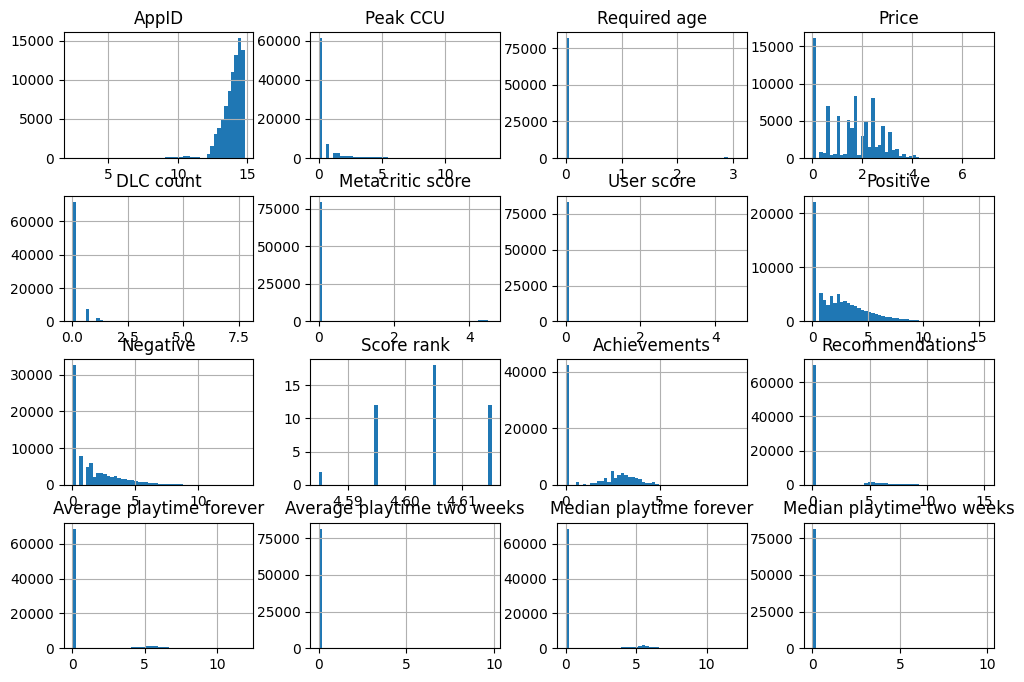

In [7]:
print(df.describe().to_markdown())  # Summary statistics for numerical features

# Plot histograms for numerical distributions
import matplotlib.pyplot as plt
plt.show()
import numpy as np

# Select numerical columns
# Extract numerical columns from the dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Apply log transformation to skewed numerical data (add 1 to avoid log(0) issue)
df_log = df.copy()
for col in numerical_columns:
    df_log[col] = np.log1p(df[col])

# Plot histograms with better scaling
df_log[numerical_columns].hist(figsize=(12, 8), bins=50)
plt.show()



In [8]:
## Decide to use following Properties: Average playtime forever, Median playtime forever, Estimated owners, price, Positive/Negative Review
"""Reason:
Price (Price):
How pricing affects ownership and user engagement.
Are expensive games more popular?

Estimated Owners (Estimated owners):
Represents how many people own the game, a key indicator of popularity.
Compare ownership to price and user score.

Positive Reviews (Positive) & Negative Reviews (Negative):
Helps evaluate overall sentiment and reception.
Compare with price, user score, and estimated owners.

Peak Concurrent Users (Peak CCU):
Shows maximum active players at once.
Helps determine engagement level.

Average Playtime Forever (Average playtime forever):
Shows long-term engagement.
Compare with price and user satisfaction.

Median Playtime Forever (Median playtime forever):
More robust against outliers than average playtime.
Helps analyze engagement trends."""



'Reason:\nPrice (Price):\nHow pricing affects ownership and user engagement.\nAre expensive games more popular?\n\nEstimated Owners (Estimated owners):\nRepresents how many people own the game, a key indicator of popularity.\nCompare ownership to price and user score.\n\nPositive Reviews (Positive) & Negative Reviews (Negative):\nHelps evaluate overall sentiment and reception.\nCompare with price, user score, and estimated owners.\n\nPeak Concurrent Users (Peak CCU):\nShows maximum active players at once.\nHelps determine engagement level.\n\nAverage Playtime Forever (Average playtime forever):\nShows long-term engagement.\nCompare with price and user satisfaction.\n\nMedian Playtime Forever (Median playtime forever):\nMore robust against outliers than average playtime.\nHelps analyze engagement trends.'

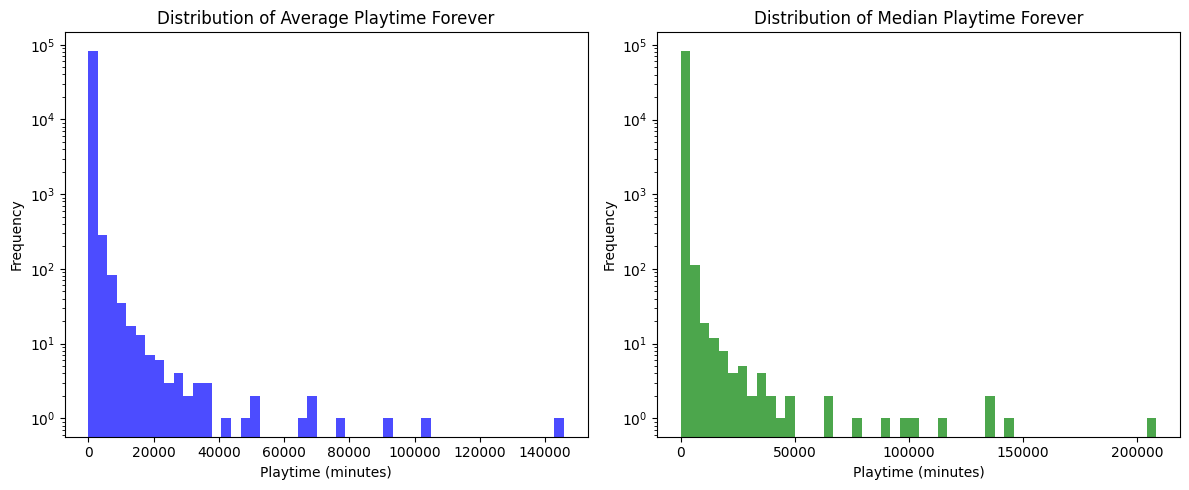

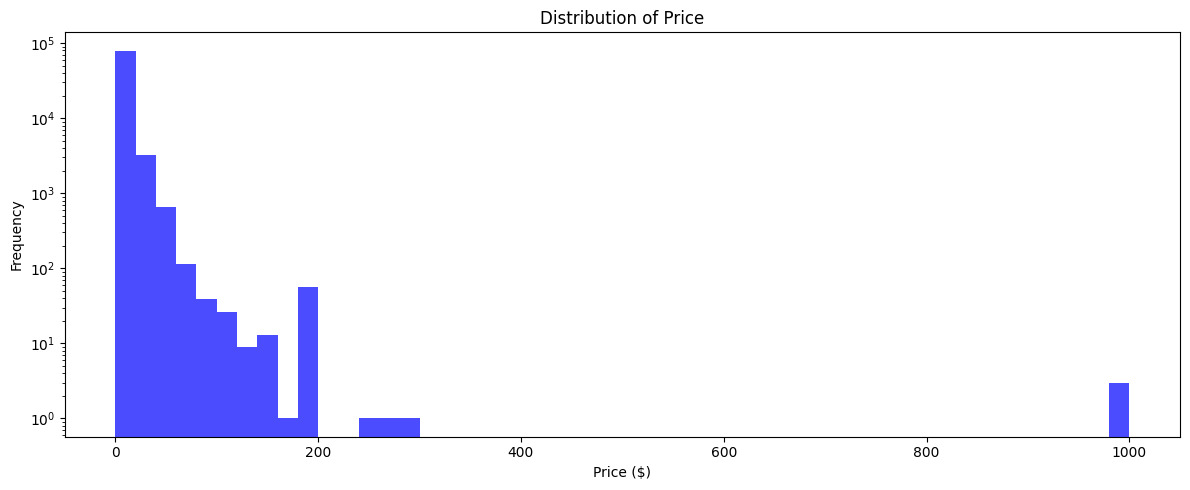

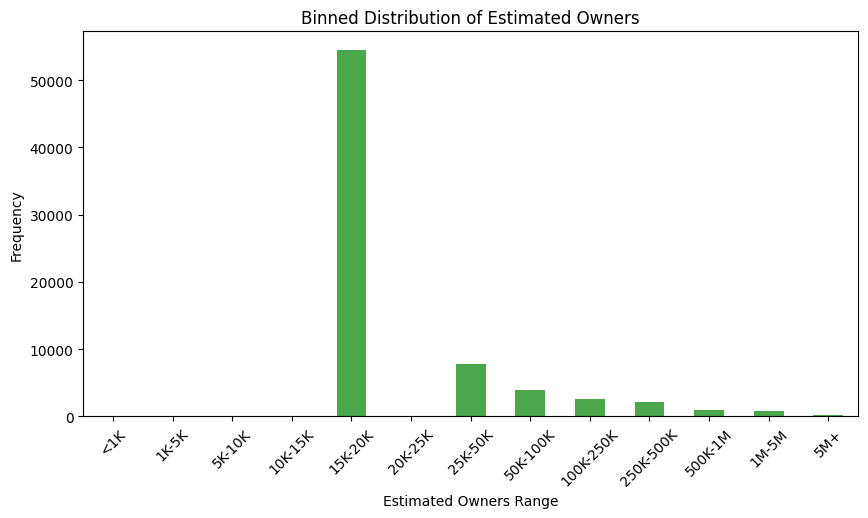

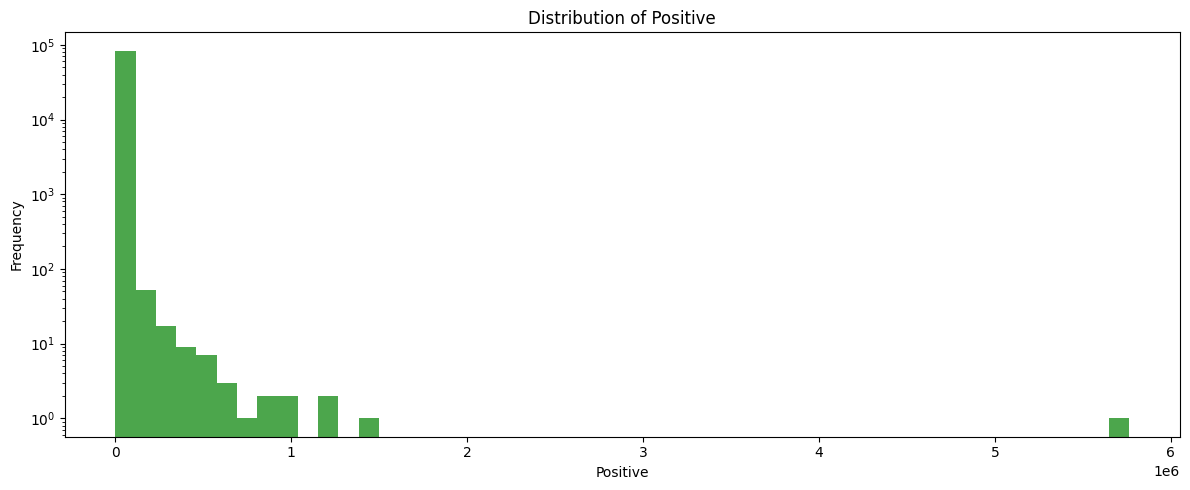

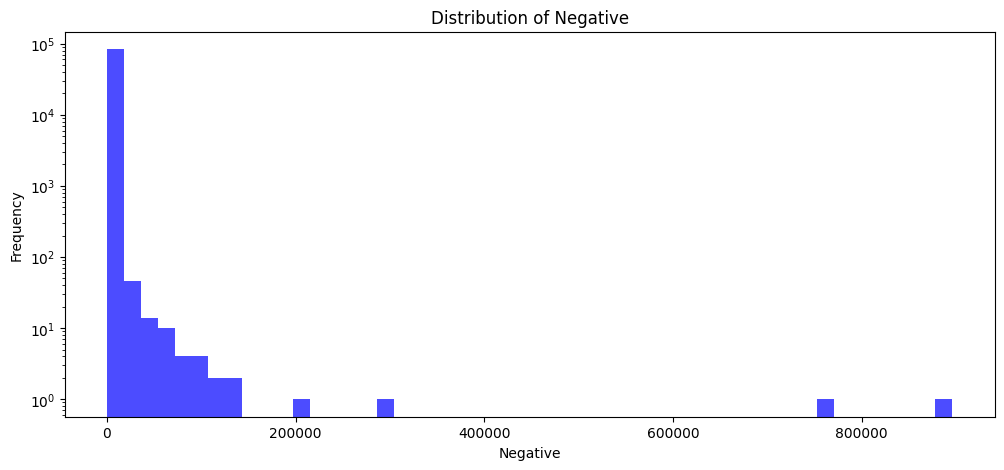

In [9]:
# Properties deeper visualization : 'Average playtime forever', 'Median playtime forever'
# Extract the relevant columns
playtime_data = df[['Average playtime forever', 'Median playtime forever']]

# Plot histograms for both columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(playtime_data['Average playtime forever'], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Distribution of Average Playtime Forever')
axes[0].set_xlabel('Playtime (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')  # Log scale to handle large counts of 0s

axes[1].hist(playtime_data['Median playtime forever'], bins=50, color='green', alpha=0.7)
axes[1].set_title('Distribution of Median Playtime Forever')
axes[1].set_xlabel('Playtime (minutes)')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')  # Log scale to handle large counts of 0s

plt.tight_layout()
plt.show()

# Properties deeper visualization : price
# Extract relevant columns
price_owners_data = df[['Price']]

# Plot histograms for both columns
fig, axes = plt.subplots(1, figsize=(12, 5))

axes.hist(price_owners_data['Price'], bins=50, color='blue', alpha=0.7)
axes.set_title('Distribution of Price')
axes.set_xlabel('Price ($)')
axes.set_ylabel('Frequency')
axes.set_yscale('log')  # Log scale for better visualization



plt.tight_layout()
plt.show()

# Properties deeper visualization : Estimated owners
# Convert 'Estimated owners' to numeric values by extracting the upper bound from the range
df['Estimated owners'] = df['Estimated owners'].astype(str).str.split('-').str[-1].str.replace(',', '').astype(float)

# Define bins for estimated owners
# Define narrower bins for estimated owners
# Define bins with a more granular breakdown for 10K to 25K range
bins = [0, 1000, 5000, 10000, 15000, 20000, 25000, 50000, 100000, 250000, 500000, 1000000, 5000000, df['Estimated owners'].max()]
labels = ["<1K", "1K-5K", "5K-10K", "10K-15K", "15K-20K", "20K-25K", "25K-50K", "50K-100K", "100K-250K",
          "250K-500K", "500K-1M", "1M-5M", "5M+"]

# Apply binning
df['Owners Binned'] = pd.cut(df['Estimated owners'], bins=bins, labels=labels)

# Plot histogram with bins
plt.figure(figsize=(10, 5))
df['Owners Binned'].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7)
plt.title('Binned Distribution of Estimated Owners')
plt.xlabel('Estimated Owners Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Properties deeper visualization :  Peak Concurrent Users (Peak CCU), User Score (User score)

# Extract relevant columns
peak_ccu_user_score_data = df[[ 'Positive']]

# Plot histograms for both columns
fig, axes = plt.subplots(1, figsize=(12, 5))


axes.hist(peak_ccu_user_score_data['Positive'], bins=50, color='green', alpha=0.7)
axes.set_title('Distribution of Positive')
axes.set_xlabel('Positive')
axes.set_ylabel('Frequency')
axes.set_yscale('log')  # Log scale to handle skewed distribution

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, figsize=(12, 5))
Negative_data = df[['Negative']]

axes.hist(Negative_data['Negative'], bins=50, color='blue', alpha=0.7)
axes.set_title('Distribution of Negative')
axes.set_xlabel('Negative')
axes.set_ylabel('Frequency')
axes.set_yscale('log')  # Log scale for better visualization


In [10]:
"""Also developer and publisher are extracted, they would be environment that we provide to final AI agent, that AI agent would consider these three factors, predict the market performance in next year """
# Define selected columns including AppID and set it as index
# Define selected columns including environment factors (Developer, Publisher, Release Date)
selected_columns = ['AppID', 'Name', 'Developers', 'Publishers', 'Release date' ,
                    'Average playtime forever', 'Median playtime forever', 'Estimated owners',
                    'Price', 'Positive', 'Negative']

# Create a new DataFrame with only selected columns and set AppID as index
df_selected = df[selected_columns].set_index('AppID')

df_selected.head(100)


,Name,Developers,Publishers,Release date,Average playtime forever,Median playtime forever,Estimated owners,Price,Positive,Negative
AppID,,,,,,,,,,
20200,Galactic Bowling,Perpetual FX Creative,Perpetual FX Creative,"Oct 21, 2008",0,0,20000.0,19.99,6,11
655370,Train Bandit,Rusty Moyher,Wild Rooster,"Oct 12, 2017",0,0,20000.0,0.99,53,5
1732930,Jolt Project,Campião Games,Campião Games,"Nov 17, 2021",0,0,20000.0,4.99,0,0
1355720,Henosis™,Odd Critter Games,Odd Critter Games,"Jul 23, 2020",0,0,20000.0,5.99,3,0
1139950,Two Weeks in Painland,Unusual Games,Unusual Games,"Feb 3, 2020",0,0,20000.0,0.00,50,8
...,...,...,...,...,...,...,...,...,...,...
1662060,Moon Farming - Prologue,SimulaM,PlayWay S.A,"Jan 6, 2022",0,0,0.0,0.00,0,0
457140,Oxygen Not Included,Klei Entertainment,Klei Entertainment,"Jul 30, 2019",3574,1003,5000000.0,24.99,82902,3014
1774810,Laruaville 10 Match 3 Puzzle,LGT SIA,LGT SIA,"Oct 17, 2021",0,0,20000.0,6.99,1,1


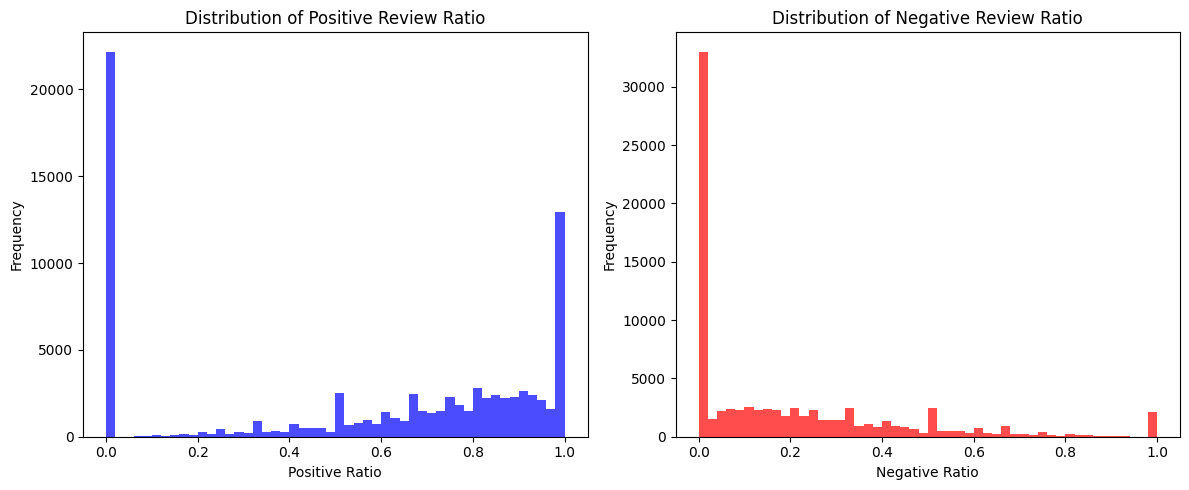

In [11]:
df_normalized = df_selected.copy()

# Calculate total reviews (Positive + Negative)
df_normalized['Total Reviews'] = df_normalized['Positive'] + df_normalized['Negative']

# Avoid division by zero by replacing 0 total reviews with 1 (to keep ratio as 0)
df_normalized['Total Reviews'] = df_normalized['Total Reviews'].replace(0, 1)

# Normalize Positive and Negative reviews
df_normalized['Positive Ratio'] = df_normalized['Positive'] / df_normalized['Total Reviews']
df_normalized['Negative Ratio'] = df_normalized['Negative'] / df_normalized['Total Reviews']

# Drop the 'Total Reviews' column as it's only needed for calculation
df_normalized.drop(columns=['Total Reviews'], inplace=True)

# Plot histogram for Positive and Negative Ratios
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df_normalized['Positive Ratio'], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Distribution of Positive Review Ratio')
axes[0].set_xlabel('Positive Ratio')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_normalized['Negative Ratio'], bins=50, color='red', alpha=0.7)
axes[1].set_title('Distribution of Negative Review Ratio')
axes[1].set_xlabel('Negative Ratio')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
print(df_normalized.describe().to_markdown())

|       |   Average playtime forever |   Median playtime forever |   Estimated owners |       Price |        Positive |   Negative |   Positive Ratio |   Negative Ratio |
|:------|---------------------------:|--------------------------:|-------------------:|------------:|----------------:|-----------:|-----------------:|-----------------:|
| count |                  83560     |                83560      |    83560           | 83560       | 83560           |  83560     |     83560        |     83560        |
| mean  |                    106.641 |                   95.0166 |   124017           |     7.19532 |   976.05        |    162.522 |         0.569538 |         0.190479 |
| std   |                   1152.85  |                 1524.56   |        1.41561e+06 |    12.3123  | 24582.7         |   4616.33  |         0.385809 |         0.240582 |
| min   |                      0     |                    0      |        0           |     0       |     0           |      0     |         0   

In [13]:
# Create a new DataFrame to store binned values
df_binned = df_normalized.copy()

# Define manual bin ranges for each numerical column with 3 levels (0,1,2)
bin_ranges = {
    'Average playtime forever': [0, 5, 20000, float('inf')],  # Low: 0, Medium: 1-100, High: 100+
    'Median playtime forever': [0, 10, 40000, float('inf')],    # Low: 0, Medium: 1-50, High: 50+
    'Estimated owners': [0, 20000, 1000000, float('inf')],   # Low: 0-50K, Medium: 50K-500K, High: 500K+
    'Price': [0, 5, 40, float('inf')],                     # Low: 0-5, Medium: 5-20, High: 20+
    'Positive Ratio': [0, 0.5, 0.8, float('inf')],               # Low: 0-10, Medium: 10-1K, High: 1K+
    'Negative Ratio': [0, 0.5, 0.8, float('inf')]                         # Low: 0-40, Medium: 40-80, High: 80-100
}

# Apply manual binning using pd.cut() with 3 categories (0,1,2)
for col, bins in bin_ranges.items():
    df_binned[col] = pd.cut(df_binned[col], bins=bins, labels=[0, 1, 2], include_lowest=True)
df_binned

,Name,Developers,Publishers,Release date,Average playtime forever,Median playtime forever,Estimated owners,Price,Positive,Negative,Positive Ratio,Negative Ratio
AppID,,,,,,,,,,,,
20200,Galactic Bowling,Perpetual FX Creative,Perpetual FX Creative,"Oct 21, 2008",0,0,0,1,6,11,0,1
655370,Train Bandit,Rusty Moyher,Wild Rooster,"Oct 12, 2017",0,0,0,0,53,5,2,0
1732930,Jolt Project,Campião Games,Campião Games,"Nov 17, 2021",0,0,0,0,0,0,0,0
1355720,Henosis™,Odd Critter Games,Odd Critter Games,"Jul 23, 2020",0,0,0,1,3,0,2,0
1139950,Two Weeks in Painland,Unusual Games,Unusual Games,"Feb 3, 2020",0,0,0,0,50,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2591500,Sex Simulator - Office Promotion,EroticGamesClub,EroticGamesClub,"Sep 16, 2023",0,0,0,0,0,0,0,0
2540690,UFindO,Piece Of Voxel,Piece Of Voxel,"Aug 21, 2023",0,0,0,0,8,1,2,0
2308790,UNDRESS!,aquma,aquma,"Oct 23, 2023",0,0,0,0,0,0,0,0


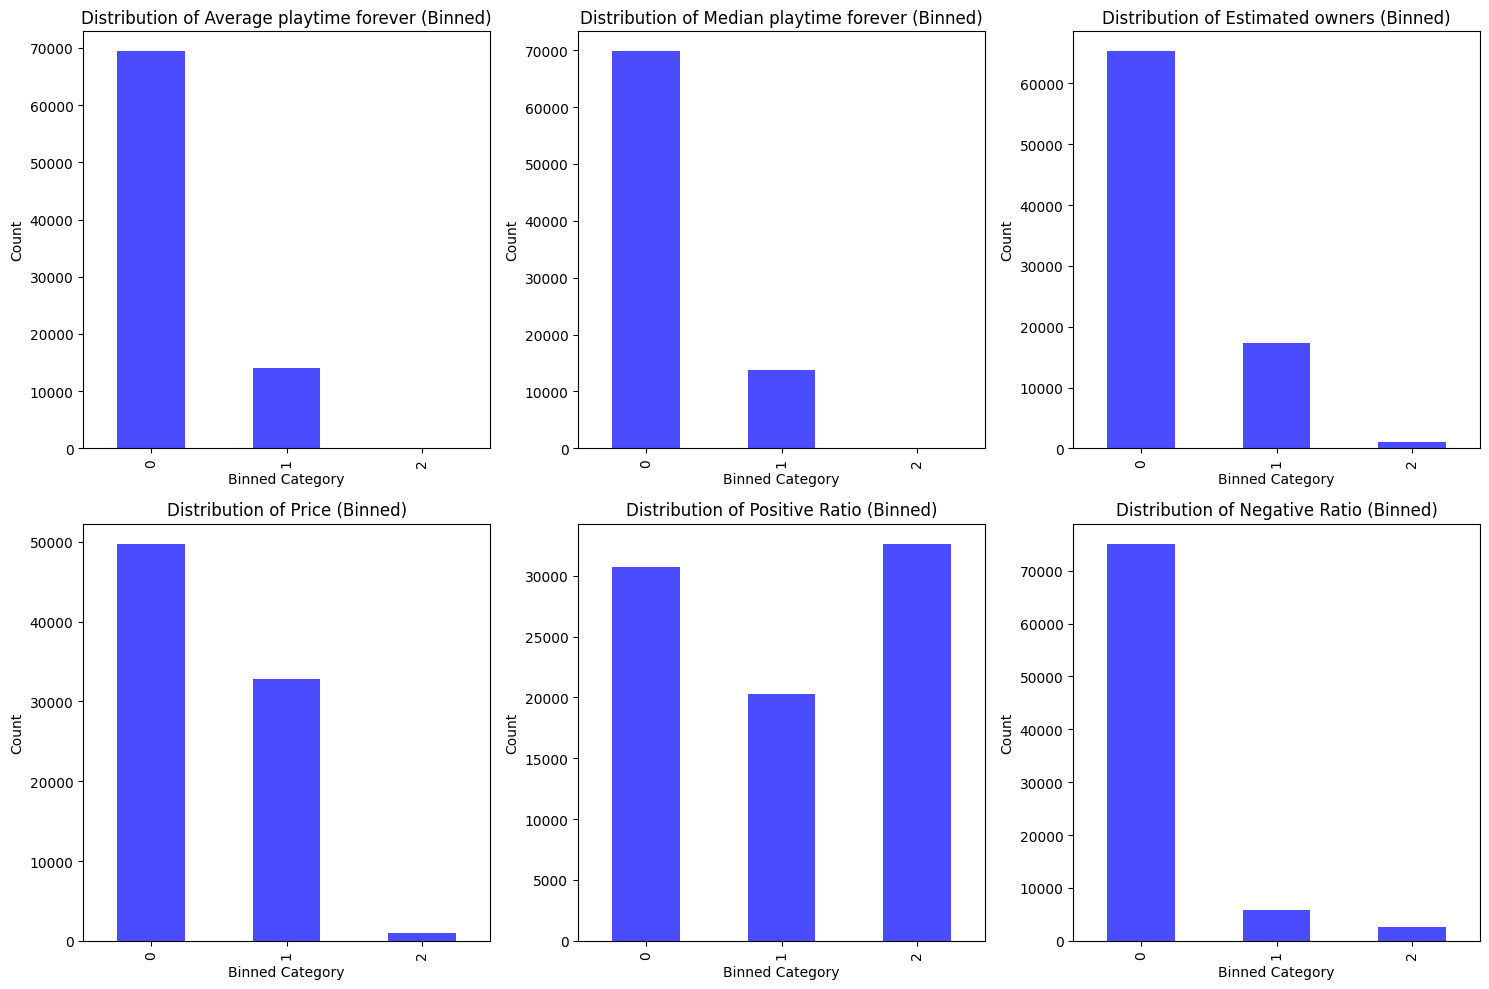

In [14]:

# Define the columns to visualize after binning
binned_columns = ['Average playtime forever', 'Median playtime forever', 'Estimated owners',
                  'Price', 'Positive Ratio','Negative Ratio']

# Plot the distribution of binned values
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(binned_columns):
    df_binned[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='blue', alpha=0.7)
    axes[i].set_title(f'Distribution of {col} (Binned)')
    axes[i].set_xlabel('Binned Category')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


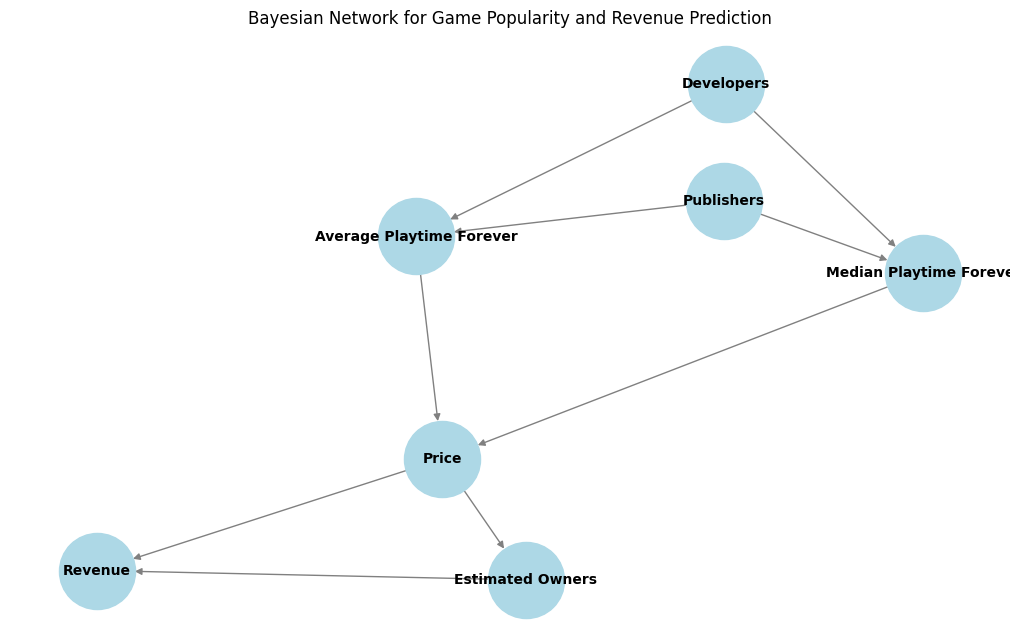

In [15]:
#Bayesian Network Form
'''Bayesian Network Description:
The Bayesian Network models the relationships between key factors influencing a game's success, focusing on popularity, pricing, estimated owners, and revenue.

Predicting Popularity:

The developer, publisher, and release date of a game significantly impact its overall popularity.
Popularity is measured using Average Playtime Forever and Median Playtime Forever, which indicate player engagement.
Estimating Price:

Once the popularity metrics are determined, they influence the game's price.
More engaging games may justify higher prices, while lower engagement may lead to discounts or lower starting prices.
Predicting Sales (Estimated Owners):

The price of a game affects the number of estimated owners, as pricing plays a crucial role in player adoption.
Lower prices may lead to higher adoption, while premium pricing may result in fewer but high-value purchases.
Revenue Calculation:

The number of estimated owners ultimately determines total revenue, as it directly correlates with sales performance.
Additionally, price also directly influences revenue, as a higher price per unit can compensate for fewer sales, while lower prices require higher sales volume to generate significant revenue. '''
import networkx as nx

# Define the Bayesian Network edges based on the refined description
edges = [
    ('Developers', 'Average Playtime Forever'),
    ('Publishers', 'Average Playtime Forever'),

    ('Developers', 'Median Playtime Forever'),
    ('Publishers', 'Median Playtime Forever'),

    ('Average Playtime Forever', 'Price'),
    ('Median Playtime Forever', 'Price'),

    ('Price', 'Estimated Owners'),
    ('Estimated Owners', 'Revenue'),
    ('Price', 'Revenue')  # Price also directly impacts revenue
]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Draw the Bayesian Network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=100)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")

plt.title("Bayesian Network for Game Popularity and Revenue Prediction")
plt.show()



In [16]:
# Convert 'Average Playtime Forever' and 'Median Playtime Forever' to numerical type
df_binned['Average playtime forever'] = pd.to_numeric(df_binned['Average playtime forever'], errors='coerce')
df_binned['Median playtime forever'] = pd.to_numeric(df_binned['Median playtime forever'], errors='coerce')

# Display the first few rows to verify the transformation
df_binned[['Average playtime forever', 'Median playtime forever']].head()


,Average playtime forever,Median playtime forever
AppID,,
20200,0,0
655370,0,0
1732930,0,0
1355720,0,0
1139950,0,0


In [17]:
  # Replace with actual file path

# Shuffle the dataset randomly before splitting
df_shuffled = df_binned.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into 80% training and 20% testing
train_size = int(0.8 * len(df_shuffled))
df_train = df_shuffled.iloc[:train_size]
df_test = df_shuffled.iloc[train_size:]

df_train


,Name,Developers,Publishers,Release date,Average playtime forever,Median playtime forever,Estimated owners,Price,Positive,Negative,Positive Ratio,Negative Ratio
0,Rock Life: The Rock Simulator,BGNB Studios,BGNB Studios,"Jul 20, 2022",0,0,0,0,0,0,0,0
1,Zombie Panic! Source,Zombie Panic! Team,Zombie Panic! Team,"Oct 3, 2008",1,1,1,0,6149,1102,2,0
2,Clash Cup Turbo,ROOT 76,ROOT 76,"Dec 4, 2020",0,0,0,1,0,0,0,0
3,Hentai Girl,GirlGames,GirlGames,"Aug 17, 2018",1,1,1,0,4662,450,2,0
4,Maze of Bears,Stuart Bray,Snappy Fingers,"Jan 4, 2022",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66843,Cardsweeper,Bandage and Go,Bandage and Go,"Feb 2, 2020",0,0,0,0,1,0,2,0
66844,Super Power: Rising of A.I.,SecondWorldVR Studios,SecondWorldVR Studios,"Dec 1, 2020",0,0,0,1,0,0,0,0
66845,BrainTeaser,INFINITE BRIDGE,INFINITE BRIDGE,"May 16, 2021",0,0,0,0,1,2,0,1
66846,Fishing Together,William at Oxford,William at Oxford,"Oct 30, 2020",0,0,0,0,10,0,2,0


In [18]:
parent_vars = ['Developers', 'Publishers']
target_vars = ['Average playtime forever', 'Median playtime forever']
cpt_tables = {}

for target in target_vars:
    # Compute probability distribution for each category of target variable
    cpt = df_binned.groupby(parent_vars)[target].value_counts(normalize = True).unstack().fillna(0)
    cpt_tables[target] = cpt  # Store CPT

# Display CPT for 'Average Playtime Forever'
cpt_tables['Average playtime forever']

,Average playtime forever,0,1,2
Developers,Publishers,,,
!CyberApex (SkagoGames),SkagoGames,1.0,0.0,0.0
#12,Fish Goblin Games,1.0,0.0,0.0
#NVJOB,INFINITE BRIDGE,1.0,0.0,0.0
#workshop,NVLMaker,0.0,1.0,0.0
$mitE,$mitE,1.0,0.0,0.0
...,...,...,...,...
（Hong Kong）GKD,（Hong Kong）GKD,1.0,0.0,0.0
（Hong Kong）GKD Game Studio,（Hong Kong）GKD Game Studio,0.0,1.0,0.0
＼上／,上原諒祐,1.0,0.0,0.0


In [19]:
cpt_tables['Average playtime forever'].xs(('（Hong Kong）GKD Game Studio', '（Hong Kong）GKD Game Studio'), level=['Developers', 'Publishers']).values.tolist()

[[0.0, 1.0, 0.0]]

In [20]:
cpt_tables['Average playtime forever'].xs(('#12', 'Fish Goblin Games'), level=['Developers', 'Publishers']).idxmax()

,0
Average playtime forever,
0,"(#12, Fish Goblin Games)"
1,"(#12, Fish Goblin Games)"
2,"(#12, Fish Goblin Games)"


In [21]:
# Compute CPT for 'Price' given 'Average Playtime Forever' and 'Median Playtime Forever'
df_cpt_price = df_binned.groupby(['Average playtime forever', 'Median playtime forever'])['Price'].value_counts(normalize=True).unstack().fillna(0)

# Display the first few rows of the CPT DataFrame
df_cpt_price


Price                                                    0         1         2
Average playtime forever Median playtime forever                              
0                        0                        0.630829  0.360617  0.008554
                         1                        0.000000  0.000000  0.000000
                         2                        0.000000  0.000000  0.000000
1                        0                        0.670185  0.324538  0.005277
                         1                        0.414812  0.561255  0.023933
                         2                        0.000000  0.000000  0.000000
2                        0                        0.000000  0.000000  0.000000
                         1                        0.500000  0.450000  0.050000
                         2                        0.642857  0.214286  0.142857

In [22]:
df_cpt_price.loc[(0, 1)].to_list()

[0.0, 0.0, 0.0]

In [23]:
# Compute CPT for 'Estimated Owners' given 'Price'
df_cpt_estimated_owners = df_binned.groupby(['Price'])['Estimated owners'].value_counts(normalize=True).unstack().fillna(0)

# Display the first few rows of the CPT DataFrame
df_cpt_estimated_owners


<ipython-input-23-05fc2a018e67>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cpt_estimated_owners = df_binned.groupby(['Price'])['Estimated owners'].value_counts(normalize=True).unstack().fillna(0)


Estimated owners,0,1,2
Price,,,
0,0.814123,0.178985,0.006893
1,0.735617,0.246494,0.017889
2,0.637540,0.282632,0.079827


In [24]:
"""
PEAS Description of the AI Agent
Our AI agent is designed to predict game popularity and revenue using a Bayesian Network model based on historical game data.

PEAS Components
PEAS stands for Performance measure, Environment, Actuators, and Sensors.

Component	Description
Performance Measure	The AI agent is evaluated based on its prediction accuracy for game popularity (playtime, owners) and financial success (revenue). We aim for high predictive accuracy and meaningful insights.
Environment	The "world" is the gaming industry, where factors like developers, publishers, release date, price, and user reviews influence a game's popularity, sales, and revenue.
Actuators	The AI agent does not take direct actions in the world but provides predictions that could be used by game studios, publishers, or analysts to make informed decisions on pricing, marketing, and game development.
Sensors	The dataset acts as the sensor input, providing structured information about past games, including developer, publisher, price, playtime, user reviews, and sales numbers.

Understanding the "World" of the AI Agent
The AI agent operates in a probabilistic, uncertain world where multiple factors affect game success.
Historical game data is used to infer relationships between variables.
The AI predicts future outcomes based on prior trends and Bayesian probability.

Type of AI Agent: Goal-Based, Utility-Based, or Other?
Our AI agent is a Goal-Based Agent:
Goal-Based: The goal is to predict game success, optimizing for higher playtime, sales, and revenue.

Where the AI Agent Fits in Probabilistic Modeling
Bayesian Network Approach:
The agent learns probabilistic dependencies between game factors (developer, price, reviews) and predicts future playtime, sales, and revenue.

Uncertainty Handling:
Instead of making fixed predictions, the agent provides a range of possible outcomes, assigning probabilities to different scenarios.

Decision Support:
The AI helps game developers assess risks and rewards when launching new games.
 """

'\nPEAS Description of the AI Agent\nOur AI agent is designed to predict game popularity and revenue using a Bayesian Network model based on historical game data.\n\nPEAS Components\nPEAS stands for Performance measure, Environment, Actuators, and Sensors.\n\nComponent\tDescription\nPerformance Measure\tThe AI agent is evaluated based on its prediction accuracy for game popularity (playtime, owners) and financial success (revenue). We aim for high predictive accuracy and meaningful insights.\nEnvironment\tThe "world" is the gaming industry, where factors like developers, publishers, release date, price, and user reviews influence a game\'s popularity, sales, and revenue.\nActuators\tThe AI agent does not take direct actions in the world but provides predictions that could be used by game studios, publishers, or analysts to make informed decisions on pricing, marketing, and game development.\nSensors\tThe dataset acts as the sensor input, providing structured information about past game

In [52]:
class BayesianNetworkModel:
    def Get_CPT_Avg_Median(self):
        parent_vars = ['Developers', 'Publishers']
        target_vars = ['Average playtime forever', 'Median playtime forever']
        cpt_tables = {}

        for target in target_vars:
            # Compute probability distribution for each category of target variable
            cpt = self.binidf.groupby(parent_vars)[target].value_counts(normalize = True).unstack().fillna(0)
            cpt_tables[target] = cpt  # Store CPT
        return cpt_tables
    def Get_CPT_Price(self):
        df_cpt_price = self.binidf.groupby(['Average playtime forever', 'Median playtime forever'])['Price'].value_counts(normalize=True).unstack().fillna(0)
        return df_cpt_price
    def Get_CPT_Estimated_Owners(self):
        df_cpt_estimated_owners = self.binidf.groupby(['Price'])['Estimated owners'].value_counts(normalize=True).unstack().fillna(0)
        return df_cpt_estimated_owners
    def Clean_Normalize(self, intidf, percent):
        # Define selected columns including AppID and set it as index
        # Define selected columns including environment factors (Developer, Publisher, Release Date)
        selected_columns = ['AppID', 'Name', 'Developers', 'Publishers', 'Release date' ,
                    'Average playtime forever', 'Median playtime forever', 'Estimated owners',
                    'Price', 'Positive', 'Negative']

        # Create a new DataFrame with only selected columns and set AppID as index
        df_selected = df[selected_columns].set_index('AppID')
        df_normalized = df_selected.copy()

        # Calculate total reviews (Positive + Negative)
        df_normalized['Total Reviews'] = df_normalized['Positive'] + df_normalized['Negative']

        # Avoid division by zero by replacing 0 total reviews with 1 (to keep ratio as 0)
        df_normalized['Total Reviews'] = df_normalized['Total Reviews'].replace(0, 1)

        # Normalize Positive and Negative reviews
        df_normalized['Positive Ratio'] = df_normalized['Positive'] / df_normalized['Total Reviews']
        df_normalized['Negative Ratio'] = df_normalized['Negative'] / df_normalized['Total Reviews']

        # Drop the 'Total Reviews' column as it's only needed for calculation
        df_normalized.drop(columns=['Total Reviews'], inplace=True)
        # Create a new DataFrame to store binned values
        df_binned = df_normalized.copy()

        # Define manual bin ranges for each numerical column with 3 levels (0,1,2)
        bin_ranges = {
            'Average playtime forever': [0, 5, 20000, float('inf')],  # Low: 0, Medium: 1-100, High: 100+
            'Median playtime forever': [0, 10, 40000, float('inf')],    # Low: 0, Medium: 1-50, High: 50+
            'Estimated owners': [0, 20000, 1000000, float('inf')],   # Low: 0-50K, Medium: 50K-500K, High: 500K+
            'Price': [0, 5, 40, float('inf')],                     # Low: 0-5, Medium: 5-20, High: 20+
            'Positive Ratio': [0, 0.5, 0.8, float('inf')],               # Low: 0-10, Medium: 10-1K, High: 1K+
            'Negative Ratio': [0, 0.5, 0.8, float('inf')]                         # Low: 0-40, Medium: 40-80, High: 80-100
        }
        # Apply manual binning using pd.cut() with 3 categories (0,1,2)
        for col, bins in bin_ranges.items():
            df_binned[col] = pd.cut(df_binned[col], bins=bins, labels=[0, 1, 2], include_lowest=True)
        df_binned['Average playtime forever'] = pd.to_numeric(df_binned['Average playtime forever'], errors='coerce')
        df_binned['Median playtime forever'] = pd.to_numeric(df_binned['Median playtime forever'], errors='coerce')
        df_shuffled = df_binned.sample(frac=1, random_state= np.random.randint(0, 10000) ).reset_index(drop=True)
        return df_shuffled.iloc[:int(percent*len(df_binned))], df_shuffled.iloc[int(percent*len(df_binned)):]
    def reinit(self, percent):
        self.binidf, self.testidf = self.Clean_Normalize(self.intidf, percent)
        self.cpt_avg_med = self.Get_CPT_Avg_Median()
        self.cpt_price = self.Get_CPT_Price()
        self.cpt_estimated_owners = self.Get_CPT_Estimated_Owners()
    def __init__(self, percent):
        """
        Initialize the Bayesian Network with given CPTs.

        :param cpt_dict: Dictionary of Conditional Probability Tables (CPTs)
        """
        self.intidf = pd.read_parquet("hf://datasets/FronkonGames/steam-games-dataset/data/train-00000-of-00001-e2ed184370a06932.parquet")
        self.binidf, self.testidf = self.Clean_Normalize(self.intidf, percent)
        self.cpt_avg_med = self.Get_CPT_Avg_Median()
        self.cpt_price = self.Get_CPT_Price()
        self.cpt_estimated_owners = self.Get_CPT_Estimated_Owners()
    def get_probabilityA(self, Developers,Publishers):
        """
        Compute the probability distribution of a target variable given conditions.

        :param target_var: The variable we want to predict.
        :param Publishers: str of given Publishers.
        :param Developers: str of given Developers.
        :return: What would be the most possible outcome of a new game from the given developers and publishers.
        """
        Probability_Avg = self.cpt_avg_med['Average playtime forever'].xs((Developers, Publishers), level=['Developers', 'Publishers']).values.tolist()[0]
        Probability_Median = self.cpt_avg_med['Median playtime forever'].xs((Developers, Publishers), level=['Developers', 'Publishers']).values.tolist()[0]
        Most_Possibe_Avg = np.argmax(Probability_Avg)
        Most_Possible_Median =  np.argmax(Probability_Median)
        Probability_price = self.cpt_price.loc[(Most_Possibe_Avg, Most_Possible_Median)].to_list()
        Most_Possible_Price = np.argmax(Probability_price)
        Probability_Estimated_Owners = self.cpt_estimated_owners.loc[Most_Possible_Price].to_list()
        Most_Possible_Estimated_Owners = np.argmax(Probability_Estimated_Owners)
        return Most_Possible_Price, Most_Possible_Estimated_Owners

    def get_range_description(column_name, bin_value):
        """
        Given a column name and a bin value (0,1,2), return the corresponding range description.

        :param column_name: The name of the feature (e.g., 'Price', 'Estimated owners').
        :param bin_value: The binned category (0, 1, or 2).
        :return: A string describing the value range.
        """
        bin_ranges = {
        'Average playtime forever': ["0 - 5", "5 - 20000", "20000+"],
        'Median playtime forever': ["0 - 10", "10 - 40000", "40000+"],
        'Estimated owners': ["0 - 20,000", "20,000 - 1,000,000", "1,000,000+"],
        'Price': ["$0 - $5", "$5 - $40", "$40+"],
        'Positive Ratio': ["0% - 50%", "50% - 80%", "80%+"],
        'Negative Ratio': ["0% - 50%", "50% - 80%", "80%+"]
          }

      # Ensure column exists in our range definitions
        if column_name not in bin_ranges:
            return "Invalid column name"

        # Ensure bin_value is valid
        if bin_value not in [0, 1, 2]:
            return "Invalid bin value"

        return bin_ranges[column_name][bin_value]

    # fixed verstion of get probability and this is use for testing much more cases
    def get_probability(self, Developers, Publishers):
      # Try to extract the probability distribution for "Average playtime forever"
      # for the given (Developers, Publishers) combination from the CPT.
      try:
          avg_series = self.cpt_avg_med['Average playtime forever'].xs(
              (Developers, Publishers), level=['Developers', 'Publishers']
          )
      except KeyError:
          # If the key (Developers, Publishers) is not found, return no prediction.
          return None, None

      # If the extracted series is empty, return no prediction.
      if avg_series.empty:
          return None, None

      # Convert the average playtime probabilities to a list.
      Probability_Avg = avg_series.values.tolist()
      # If the list is empty, return no prediction.
      if len(Probability_Avg) == 0:
          return None, None

      # Try to extract the probability distribution for "Median playtime forever"
      # for the given (Developers, Publishers) combination from the CPT.
      try:
          med_series = self.cpt_avg_med['Median playtime forever'].xs(
              (Developers, Publishers), level=['Developers', 'Publishers']
          )
      except KeyError:
          # If the key is not found, return no prediction.
          return None, None

      # If the extracted series is empty, return no prediction.
      if med_series.empty:
          return None, None

      # Convert the median playtime probabilities to a list.
      Probability_Median = med_series.values.tolist()
      # If the list is empty, return no prediction.
      if len(Probability_Median) == 0:
          return None, None

      # Select the bin (index) with the highest probability for average playtime.
      Most_Possible_Avg = np.argmax(Probability_Avg)
      # Select the bin (index) with the highest probability for median playtime.
      Most_Possible_Median = np.argmax(Probability_Median)

      # Use the most likely average and median bins to look up the Price CPT.
      try:
          price_probs = self.cpt_price.loc[(Most_Possible_Avg, Most_Possible_Median)].to_list()
      except KeyError:
          # If the Price CPT does not have data for these bins, return no prediction.
          return None, None

      # Choose the Price bin with the highest probability.
      Most_Possible_Price = np.argmax(price_probs)

      # Use the most likely Price bin to look up the Estimated Owners CPT.
      try:
          owners_probs = self.cpt_estimated_owners.loc[Most_Possible_Price].to_list()
      except KeyError:
          # If the Estimated Owners CPT does not have data for this Price bin, return no prediction.
          return None, None

      # Choose the Estimated Owners bin with the highest probability.
      Most_Possible_Estimated_Owners = np.argmax(owners_probs)

      # Return the predicted Price and Estimated Owners bins.
      return Most_Possible_Price, Most_Possible_Estimated_Owners



In [53]:
# Example usage
model = BayesianNetworkModel(1)
#Example usage of get_probability
price, estimated_owners = model.get_probability('Valve', 'Valve')

print(f"Most probable price: {price}")
print(f"Most probable estimated owners: {estimated_owners}")

# Example usage of get_range_description (standalone function)
price_range = BayesianNetworkModel.get_range_description('Price', price)
estimated_owners_range = BayesianNetworkModel.get_range_description('Estimated owners', estimated_owners)

print(f"Price range: {price_range}")
print(f"Estimated Owners range: {estimated_owners_range}")




Most probable price: 1
Most probable estimated owners: 0
Price range: $5 - $40
Estimated Owners range: 0 - 20,000


<ipython-input-52-cfc086fd406a>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cpt_estimated_owners = self.binidf.groupby(['Price'])['Estimated owners'].value_counts(normalize=True).unstack().fillna(0)


In [44]:
"""
What Else Should Be Added?
To make the AI agent more robust and functional, consider adding the following features:

1️⃣ More Advanced Inference Methods
Right now, the get_probability() function only filters the CPT based on developer and publisher.
🔹 Add full Bayesian inference to compute joint probabilities and marginalization.
🔹 Example: What is the probability of Estimated Owners given Price and Playtime?

2️⃣ Hidden Variable Estimation
Right now, the AI agent assumes all variables are observable.
🔹 Implement expectation-maximization (EM) to handle missing values.
🔹 Example: Predict missing Playtime values based on Developer & Publisher.

3️⃣ Decision-Making and Optimization
Currently, the model only provides probability outputs, but a real AI agent should take actions.
🔹 Implement utility-based decision-making to recommend the best price for a game to maximize revenue.
🔹 Example: "Given Playtime and Owners, what is the optimal price for maximum revenue?"

4️⃣ Model Evaluation & Performance Metrics
Right now, the model does not evaluate itself.
🔹 Implement performance evaluation metrics to test accuracy on a held-out dataset.
🔹 Example:

Log-likelihood to measure how well the model fits data.
Cross-validation for robust testing.
5️⃣ Data Preprocessing Improvements
🔹 Add automated outlier detection (e.g., Playtime = 999,999 minutes is likely an error).
🔹 Implement feature engineering, such as log-scaling for skewed data (e.g., playtime, sales).

6️⃣ Learning from New Data (Online Learning)
Currently, the CPTs are precomputed and static.
🔹 Implement Bayesian updating so the model learns new probabilities dynamically as more game data becomes available.


"""

'\nWhat Else Should Be Added?\nTo make the AI agent more robust and functional, consider adding the following features:\n\n1️⃣ More Advanced Inference Methods\nRight now, the get_probability() function only filters the CPT based on developer and publisher.\n🔹 Add full Bayesian inference to compute joint probabilities and marginalization.\n🔹 Example: What is the probability of Estimated Owners given Price and Playtime?\n\n2️⃣ Hidden Variable Estimation\nRight now, the AI agent assumes all variables are observable.\n🔹 Implement expectation-maximization (EM) to handle missing values.\n🔹 Example: Predict missing Playtime values based on Developer & Publisher.\n\n3️⃣ Decision-Making and Optimization\nCurrently, the model only provides probability outputs, but a real AI agent should take actions.\n🔹 Implement utility-based decision-making to recommend the best price for a game to maximize revenue.\n🔹 Example: "Given Playtime and Owners, what is the optimal price for maximum revenue?"\n\n4️⃣ 

In [54]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_bayesian_model(model, max_samples=1000):
    """
    Evaluate the BayesianNetworkModel on a subset of test data by comparing
    predicted Price & Owners bins against the actual bins in the test set.

    :param model: An instance of BayesianNetworkModel, which has already been trained.
    :param max_samples: Maximum number of test rows to evaluate.
    :return: A dictionary of evaluation metrics.
    """

    # Limit the test data to a maximum number of samples
    test_data = model.testidf.head(max_samples)

    # Lists to store predictions & actual values
    predicted_prices = []
    actual_prices = []
    predicted_owners = []
    actual_owners = []

    # Iterate over each row in the limited test set
    for idx, row in test_data.iterrows():
        dev = row['Developers']
        pub = row['Publishers']

        # Use the get_probability method
        pred = model.get_probability(dev, pub)
        # If the prediction is None or any element is None, skip this row.
        if (pred is None) or (pred[0] is None) or (pred[1] is None):
            continue

        pred_price_bin, pred_owners_bin = pred
        predicted_prices.append(pred_price_bin)
        actual_prices.append(row['Price'])

        predicted_owners.append(pred_owners_bin)
        actual_owners.append(row['Estimated owners'])

    # Check if we have any predictions after filtering
    if len(predicted_prices) == 0 or len(predicted_owners) == 0:
        print("No valid predictions available in the test set after filtering.")
        return {}

    # Convert lists to numpy arrays
    predicted_prices = np.array(predicted_prices)
    actual_prices = np.array(actual_prices)
    predicted_owners = np.array(predicted_owners)
    actual_owners = np.array(actual_owners)

    # Calculate evaluation metrics for Price predictions
    price_accuracy = accuracy_score(actual_prices, predicted_prices)
    price_confusion = confusion_matrix(actual_prices, predicted_prices)
    price_report = classification_report(actual_prices, predicted_prices, zero_division=0)

    # Calculate evaluation metrics for Estimated Owners predictions
    owners_accuracy = accuracy_score(actual_owners, predicted_owners)
    owners_confusion = confusion_matrix(actual_owners, predicted_owners)
    owners_report = classification_report(actual_owners, predicted_owners, zero_division=0)

    # Prepare a dictionary with all the metrics we need
    metrics = {
        'price_accuracy': price_accuracy,
        'price_confusion_matrix': price_confusion,
        'price_classification_report': price_report,
        'owners_accuracy': owners_accuracy,
        'owners_confusion_matrix': owners_confusion,
        'owners_classification_report': owners_report
    }


    return metrics

In [55]:
# Step 1: Instantiate the model with, say, an 80/20 train/test split.
model = BayesianNetworkModel(percent=0.8)

# Step 2: Run the evaluation on the test set.
evaluate_bayesian_model(model)

<ipython-input-52-cfc086fd406a>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cpt_estimated_owners = self.binidf.groupby(['Price'])['Estimated owners'].value_counts(normalize=True).unstack().fillna(0)


{'price_accuracy': 0.6111111111111112,
 'price_confusion_matrix': array([[232,  33,   0],
        [132,  43,   0],
        [  9,   1,   0]]),
 'price_classification_report': '              precision    recall  f1-score   support\n\n           0       0.62      0.88      0.73       265\n           1       0.56      0.25      0.34       175\n           2       0.00      0.00      0.00        10\n\n    accuracy                           0.61       450\n   macro avg       0.39      0.37      0.36       450\nweighted avg       0.58      0.61      0.56       450\n',
 'owners_accuracy': 0.7311111111111112,
 'owners_confusion_matrix': array([[329,   0,   0],
        [117,   0,   0],
        [  4,   0,   0]]),
 'owners_classification_report': '              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.84       329\n           1       0.00      0.00      0.00       117\n           2       0.00      0.00      0.00         4\n\n    accuracy                   

**Conclusion**

The implemented Bayesian network model provides a clear, interpretable framework for predicting binned outcomes—specifically, the price range and estimated owners—for new games based on key attributes like Developers and Publishers. By leveraging conditional probability tables derived from binned historical data, the model follows a logical, step-by-step chain: it first estimates gameplay metrics (average and median playtime), then infers the most likely price bin, and finally predicts the corresponding bin for estimated owners.

The evaluation process, which uses standard metrics such as accuracy, confusion matrices, and classification reports, confirms that the model can effectively map input conditions to target outcomes, albeit within the constraints of manual binning and deterministic probability lookups. This approach not only simplifies the complex relationships in the data but also offers transparent insights into the decision-making process.

While promising, the model’s performance could be further enhanced by:
- Refining the binning strategies to better capture data nuances.
- Incorporating additional features or alternative probability estimation techniques.
- Expanding the dataset to improve the robustness of the CPTs.

Overall, this Bayesian network serves as a solid starting point for predictive analytics in the gaming domain, highlighting both its practical applicability and areas for future improvement.